In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [10]:
np.random.seed(42)

data={
    'product_id': range(1,21),
    'product_name': [f"product {i}" for i in range(1,21)],
    'category': np.random.choice(['Electronics', 'Clothing', 'Home', 'Sports'], 20),
    'units_sold': np.random.poisson(lam=20, size=20),
    'sale_data': pd.date_range(start='2023-01-01', periods=20, freq='D')
}

sales_data = pd.DataFrame(data)

print("Sales Data: ")
print(sales_data)

Sales Data: 
    product_id product_name     category  units_sold  sale_data
0            1    product 1         Home          25 2023-01-01
1            2    product 2       Sports          15 2023-01-02
2            3    product 3  Electronics          17 2023-01-03
3            4    product 4         Home          19 2023-01-04
4            5    product 5         Home          21 2023-01-05
5            6    product 6       Sports          17 2023-01-06
6            7    product 7  Electronics          19 2023-01-07
7            8    product 8  Electronics          16 2023-01-08
8            9    product 9         Home          21 2023-01-09
9           10   product 10     Clothing          21 2023-01-10
10          11   product 11         Home          17 2023-01-11
11          12   product 12         Home          22 2023-01-12
12          13   product 13         Home          14 2023-01-13
13          14   product 14         Home          17 2023-01-14
14          15   product 15

# Descriptive Statisics

In [13]:
sales_data['units_sold'].describe()

count    20.000000
mean     18.800000
std       3.302312
min      13.000000
25%      17.000000
50%      18.500000
75%      21.000000
max      25.000000
Name: units_sold, dtype: float64

In [34]:
mean_sales = sales_data['units_sold'].mean()
median_sales = sales_data['units_sold'].median()
mode_sales = sales_data['units_sold'].mode()[0]
variance_sales = sales_data['units_sold'].var()
std_deviation_sales = sales_data['units_sold'].std()

In [25]:
sales_data.groupby('category')['units_sold']

In [27]:
sales_data.groupby('category')['units_sold'].agg(['sum','mean','std']).reset_index()

,category,sum,mean,std
0,Clothing,21,21.000000,NaN
1,Electronics,73,18.250000,2.217356
2,Home,181,20.111111,3.723051
3,Sports,101,16.833333,2.714160


### We can see 'Electronics' is more stable as std is lowest
### Home products is having highest total sales with 181, showing strong customer demand overall
### Clothing has the hishest average, but only one product , so its not enough to judge the category. so no variance, and spread is 0. (means i my dataset, only one row clothing)

In [45]:
confidence_level = 0.95
degrees_freedom = len(sales_data['units_sold']) - 1
sample_mean = mean_sales

sample_standard_error = std_deviation_sales/ np.sqrt(len(sales_data['units_sold']))

t_score = stats.t.ppf((1 + confidence_level)/2, degrees_freedom)
margin_of_error = t_score * sample_standard_error

confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

print(confidence_interval)

(17.254470507823573, 20.34552949217643)


### I calculated 95% confdence interval to estimate the true average units sold. I used t-distribution since I had only 20 products (small sample). I calculated standard error from the standard devaition and used the tscore to find my margin of error. This gave me a range around the sample mean where I believe, with 95% confidence, the real average lies.

In [47]:
t_statistic, p_value = stats.ttest_1samp(sales_data['units_sold'], 20)

if p_value < 0.05:
    print('Reject null hypothesis: means average sales are not 20')

else:
    print('Null Hypothesis is true. There is a chance that average units sold were 20')

Null Hypothesis is true. There is a chance that average units sold were 20


# Visualizations

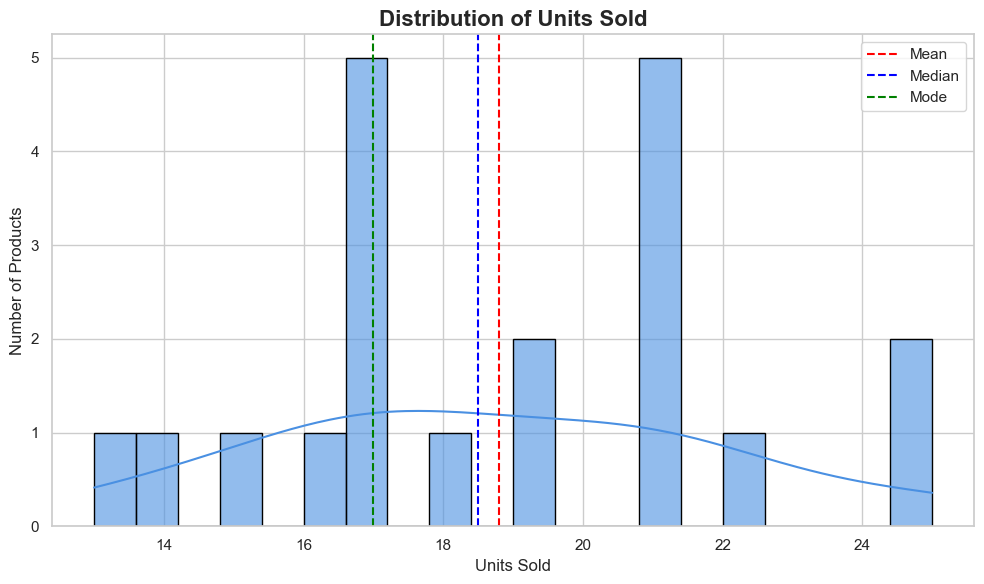

In [98]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10,6))

sns.histplot(sales_data['units_sold'], bins=20, kde=True,  color="#4A90E2", edgecolor='black', alpha=0.6)

plt.title("Distribution of Units Sold", fontsize=16, fontweight='bold')
plt.xlabel("Units Sold", fontsize=12)
plt.ylabel("Number of Products", fontsize=12)

plt.tight_layout()


plt.axvline(mean_sales, color='red', linestyle='--', label='Mean')
plt.axvline(median_sales, color='blue', linestyle='--', label='Median')
plt.axvline(mode_sales, color='green', linestyle='--', label='Mode')

plt.legend()

Text(0, 0.5, 'Units Sold')

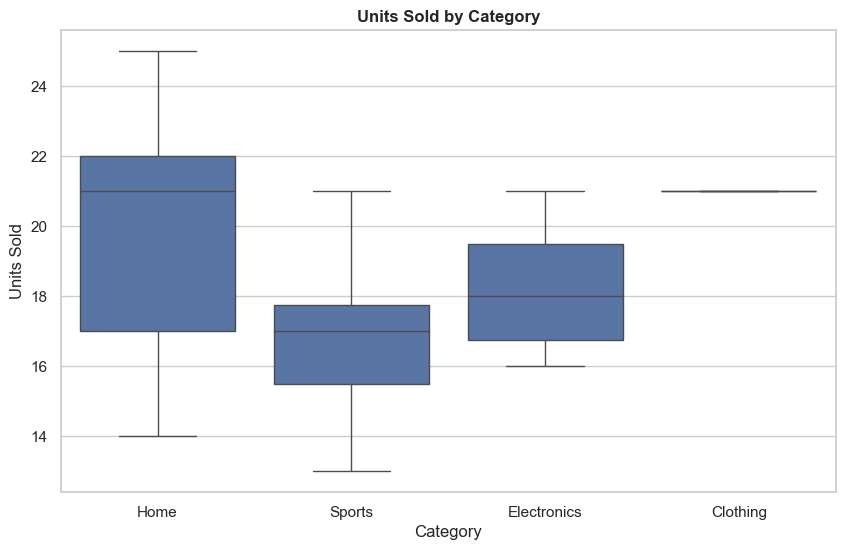

In [106]:
plt.figure(figsize = (10,6))

sns.boxplot(x='category', y='units_sold', data=sales_data)

plt.title('Units Sold by Category', fontsize=12, fontweight='bold')

plt.xlabel('Category', fontsize=12)

plt.ylabel('Units Sold', fontsize=12)